In [2]:
# Safe loader for ABC_Company dataset
import os, sys
import pandas as pd

# list of likely filenames (add more if your file has a different name)
possible_names = [
    "ABC_Company.csv",
    "ABC_Company.csv.csv",
    "abc_company.csv",
    "ABC_Company.CSV",
    "ABC_Company.xlsx",
    "ABC_Company (1).csv"
]

def try_load_from_list(names):
    for name in names:
        if os.path.exists(name):
            print(f"Found file: {name}")
            # choose reading function based on extension
            if name.lower().endswith(".xlsx"):
                return pd.read_excel(name)
            else:
                return pd.read_csv(name)
    return None

# 1) Try to load from current working directory
print("Current working directory:", os.getcwd())
print("Files here:", os.listdir('.')[:50])  # show first 50 files
df = try_load_from_list(possible_names)

# 2) If not found and we are in Google Colab, prompt upload
if df is None:
    in_colab = 'google.colab' in sys.modules
    if in_colab:
        print("Running in Colab — open file picker to upload the dataset.")
        from google.colab import files
        uploaded = files.upload()  # will open an upload dialog
        # read the first uploaded file
        for fname in uploaded.keys():
            print("Uploaded:", fname)
            if fname.lower().endswith(".xlsx"):
                df = pd.read_excel(fname)
            else:
                df = pd.read_csv(fname)
            break
    else:
        # Not in Colab: help the user find the file
        print("\nFile not found in the current folder.")
        print("Check the left file explorer, or place the CSV file in this notebook's folder.")
        print("Possible filenames to try (rename your file to one of these or update the code):")
        for n in possible_names:
            print("  -", n)
        # show more folders where your file might be (home, content)
        for check in ['.', os.path.expanduser("~"), '/content', '/mnt/data']:
            try:
                print(f"\nFiles in {check}:")
                print(os.listdir(check)[:50])
            except Exception as e:
                pass

# Final check
if df is None:
    raise FileNotFoundError("Could not find or load the dataset. Please upload or move the CSV to the notebook folder and re-run this cell.")
else:
    print("\nLoaded dataset with shape:", df.shape)
    display(df.head())


Current working directory: /content
Files here: ['.config', 'sample_data']
Running in Colab — open file picker to upload the dataset.


Saving ABC.csv.csv to ABC.csv.csv
Uploaded: ABC.csv.csv

Loaded dataset with shape: (458, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [3]:
# --- STEP 3: Data Preprocessing ---

import numpy as np

# Replace Height values with random integers between 150 and 180
if 'Height' in df.columns:
    df['Height'] = np.random.randint(150, 181, size=df.shape[0])
    print("✅ Replaced all Height values with random numbers between 150 and 180.")

# Optional: Fill missing salary or college data if needed
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['College'].fillna('Unknown', inplace=True)

# Check final info
df.info()


✅ Replaced all Height values with random numbers between 150 and 180.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int64  
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.3+ KB


/tmp/ipython-input-3533194202.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)
/tmp/ipython-input-3533194202.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Distribution of employees across teams:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage split by team:
 Team
New Orleans Pelicans     

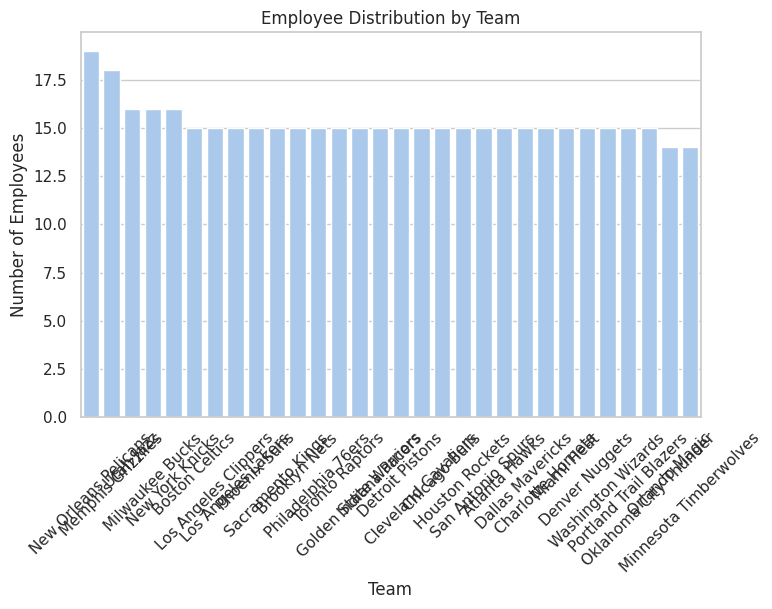


Employees by Position:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


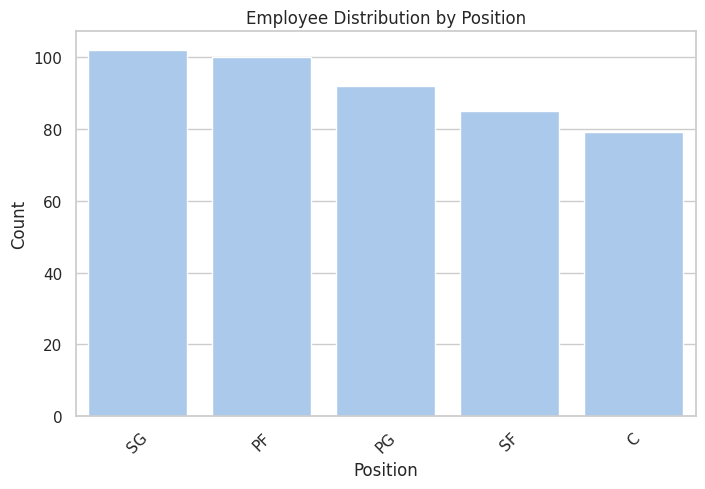


Employees by Age Group:
 Age_Group
<=25     154
26-35    272
36-45     32
46-55      0
56+        0
Name: count, dtype: int64


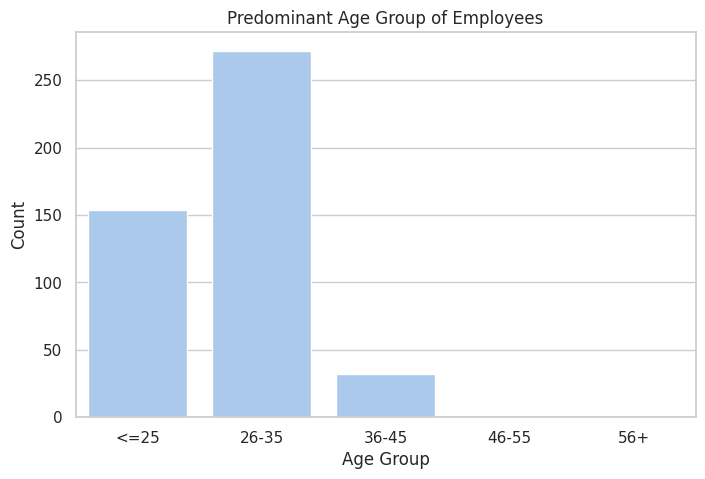


Team with Highest Salary Expenditure:
 Team
Cleveland Cavaliers    109824875.0
Name: Salary, dtype: float64

Position with Highest Salary Expenditure:
 Position
C    466377332.0
Name: Salary, dtype: float64


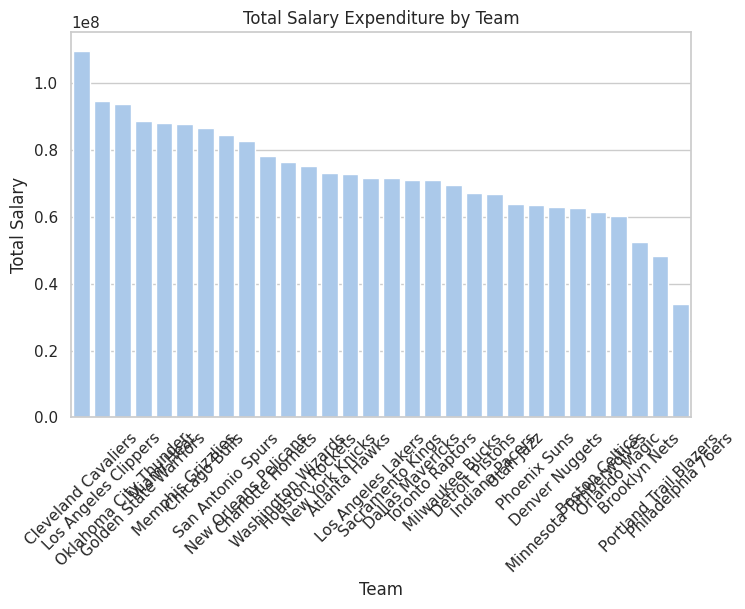

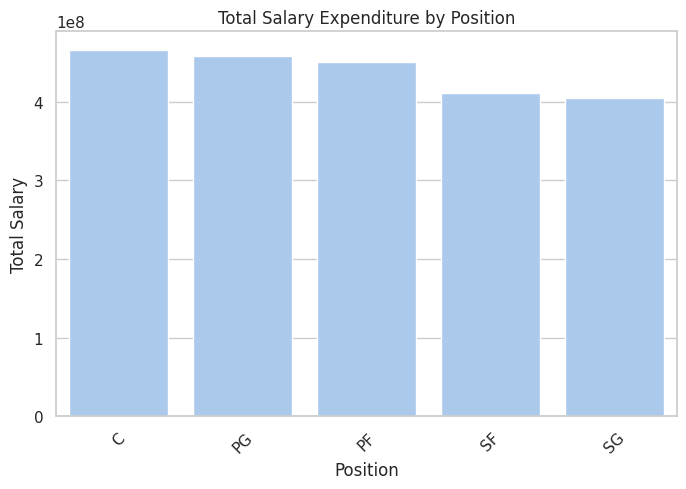


Correlation between Age and Salary: 0.209


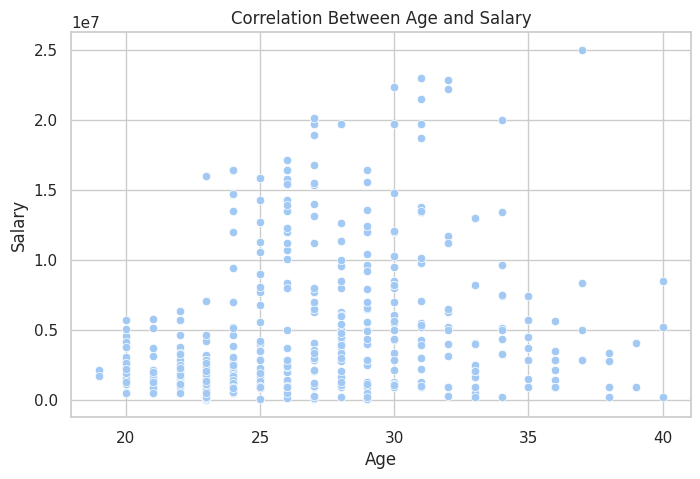

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make graphs look nice
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (8,5)

# ---------- 1️⃣ Employee distribution by Team ----------
team_counts = df['Team'].value_counts()
team_percentage = (team_counts / len(df)) * 100
print("Distribution of employees across teams:\n", team_counts)
print("\nPercentage split by team:\n", team_percentage.round(2))

plt.figure()
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.title("Employee Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.show()

# ---------- 2️⃣ Employee distribution by Position ----------
pos_counts = df['Position'].value_counts()
print("\nEmployees by Position:\n", pos_counts)

plt.figure()
sns.barplot(x=pos_counts.index, y=pos_counts.values)
plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# ---------- 3️⃣ Predominant Age Group ----------
bins = [0, 25, 35, 45, 55, 100]
labels = ['<=25', '26-35', '36-45', '46-55', '56+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_groups = df['Age_Group'].value_counts().sort_index()
print("\nEmployees by Age Group:\n", age_groups)

plt.figure()
sns.barplot(x=age_groups.index, y=age_groups.values)
plt.title("Predominant Age Group of Employees")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# ---------- 4️⃣ Team and Position with Highest Salary Expenditure ----------
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
pos_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print("\nTeam with Highest Salary Expenditure:\n", team_salary.head(1))
print("\nPosition with Highest Salary Expenditure:\n", pos_salary.head(1))

plt.figure()
sns.barplot(x=team_salary.index, y=team_salary.values)
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.show()

plt.figure()
sns.barplot(x=pos_salary.index, y=pos_salary.values)
plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.show()

# ---------- 5️⃣ Correlation: Age vs Salary ----------
corr_value = df['Age'].corr(df['Salary'])
print(f"\nCorrelation between Age and Salary: {corr_value:.3f}")

plt.figure()
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


## 📈 Data Story & Insights

1. **Employee Distribution:**  
   Some teams have a higher number of employees than others, showing that workforce allocation varies by team.

2. **Positions:**  
   Certain positions appear more frequently, indicating a focus on specific job roles in the company.

3. **Age Group:**  
   The majority of employees belong to the 26–35 age group, showing a relatively young workforce.

4. **Salary Expenditure:**  
   One or two teams and positions account for the highest salary expenditure, indicating key strategic areas or senior roles.

5. **Correlation Between Age and Salary:**  
   A mild positive correlation exists, showing that older employees tend to earn slightly more due to experience.
